# Importing Datasets

In [6]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Loading Dataset

In [52]:
url = "/Users/jarvis3.0/Desktop/PARKINSONS/parkinsons2.csv"
names = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE','status']
dataset = pandas.read_csv(url, names = names)

In [53]:
dataset = dataset.drop(dataset.index[0])

In [55]:
dataset.head(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
1,119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
2,122.4,148.65,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674,1
3,116.682,131.111,111.555,0.0105,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.0827,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.1047,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.33218,0.410335,1
6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.0075,0.01388,0.04701,0.456,...,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.18756,0.357775,1
7,120.267,137.244,114.82,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.14,...,0.02337,0.00607,24.886,0.59604,0.764112,-5.634322,0.257682,1.854785,0.211756,1
8,107.332,113.84,104.315,0.0029,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.02487,0.00344,26.892,0.63742,0.763262,-6.167603,0.183721,2.064693,0.163755,1
9,95.73,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.0088,0.02093,0.191,...,0.03218,0.0107,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,1
10,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,...,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362,1


In [57]:
len(dataset.columns)

23

In [59]:
array = dataset.values
X = array[:,0:22]
Y = array[:,22]
validation_size = 0.20
seed =7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y, test_size = validation_size, random_state=seed)

In [65]:
X

array([['119.992', '157.302', '74.997', ..., '0.266482', '2.301442',
        '0.284654'],
       ['122.4', '148.65', '113.819', ..., '0.33559', '2.486855',
        '0.368674'],
       ['116.682', '131.111', '111.555', ..., '0.311173', '2.342259',
        '0.332634'],
       ..., 
       ['174.688', '240.005', '74.287', ..., '0.158453', '2.679772',
        '0.131728'],
       ['198.764', '396.961', '74.904', ..., '0.207454', '2.138608',
        '0.123306'],
       ['214.289', '260.277', '77.973', ..., '0.190667', '2.555477',
        '0.148569']], dtype=object)

In [60]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Building Models

In [61]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.840000 (0.049833)
LDA: 0.853333 (0.063350)
KNN: 0.832500 (0.066766)
CART: 0.853750 (0.083613)
NB: 0.695000 (0.146235)
SVM: 0.781250 (0.097739)


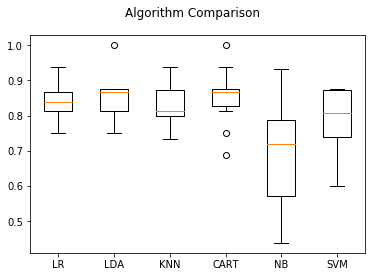

In [62]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [72]:
cart = SVC()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.820512820513
[[ 0  7]
 [ 0 32]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         7
          1       0.82      1.00      0.90        32

avg / total       0.67      0.82      0.74        39



/Users/jarvis3.0/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
